In [ ]:
np.savetxt('train_price.csv', train.price.values, delimiter=',')

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ensembles import RandomForestMSE
from ensembles import GradientBoostingMSE

In [59]:
data = pd.read_csv('train_data.csv', index_col=0).to_numpy()
target = pd.read_csv('train_target.csv', index_col=0).to_numpy().reshape((-1))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [178]:
num_feat = np.delete(np.arange(X_train.shape[1]), 1)

In [59]:
# подготовка данных для теста на Flask

data = pd.read_csv('train_data.csv', index_col=0)
target = pd.read_csv('train_target.csv', index_col=0)

num_feat = np.delete(np.arange(data.shape[1]), 1)
data = data.iloc[:, num_feat]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

X_train.to_csv('train_sample.csv', index=False)
X_test.to_csv('test_sample.csv', index=False)
y_train.to_csv('train_price.csv', index=False)
y_test.to_csv('test_price.csv', index=False)

In [17]:
selected_features = np.random.choice(X_train.shape[1], X_train.shape[1], replace=False)
X = X_train.to_numpy()

# Random Forest

In [246]:
rf = RandomForestMSE(n_estimators=50)
scores = []
times = []
iters = np.arange(50, 1001, 50)
start = time.time()
for i in iters:
    print('\r\r\r\r', i, end='')
    scores.append(rf.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 1000

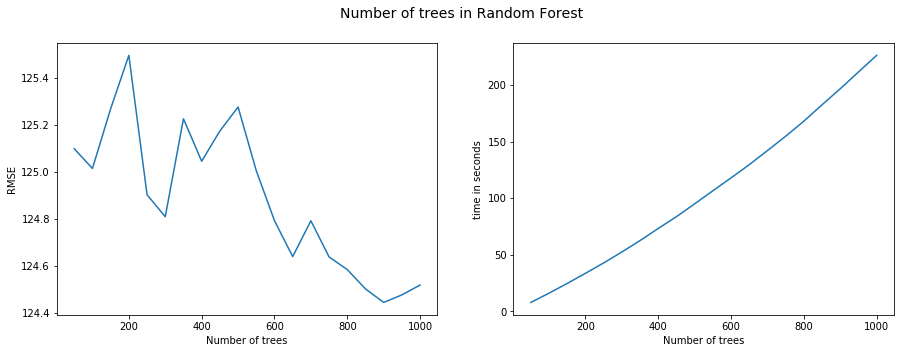

In [247]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Number of trees in Random Forest', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(iters, scores)
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(iters, times)
plt.xlabel('Number of trees')
plt.ylabel('time in seconds')

plt.show()

In [274]:
scores = []
times = []
depth = np.linspace(0.1, 1, 5)
for i in depth:
    print('\r\r\r\r\r\r\r\r', i, end='')
    start = time.time()
    rf = RandomForestMSE(n_estimators=900, feature_subsample_size=i)
    scores.append(rf.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 1.0

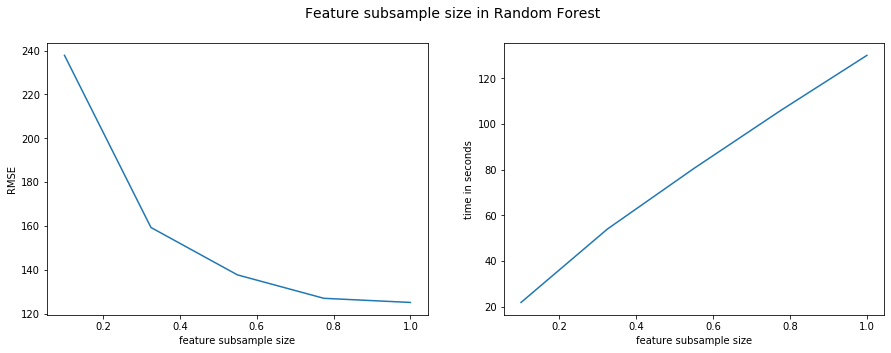

In [275]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Feature subsample size in Random Forest', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(depth, scores)
plt.xlabel('feature subsample size')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(depth, times)
plt.xlabel('feature subsample size')
plt.ylabel('time in seconds')

plt.show()

In [276]:
scores = []
times = []
max_depth = np.arange(1, 15, 3)
for i in max_depth:
    print('\r\r\r\r\r\r\r\r', i, end='')
    start = time.time()
    rf = RandomForestMSE(n_estimators=900, feature_subsample_size=1, max_depth=i)
    scores.append(rf.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 13

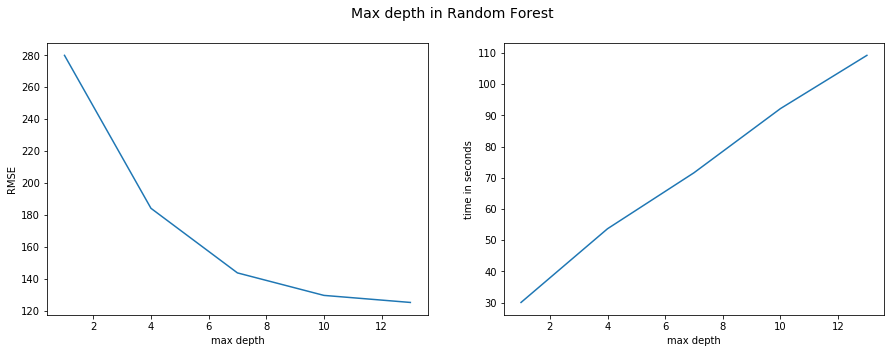

In [277]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Max depth in Random Forest', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(max_depth, scores)
plt.xlabel('max depth')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(max_depth, times)
plt.xlabel('max depth')
plt.ylabel('time in seconds')

plt.show()

In [252]:
scores[-1], times[-1]

(126.5194890989789, 357.32329201698303)

In [253]:
scores

[278.5452074375525,
 184.02143367967278,
 144.1010681225625,
 129.69930841780828,
 126.5194890989789]

In [254]:
times

[31.04021406173706,
 86.1955018043518,
 159.84515690803528,
 251.48451900482178,
 357.32329201698303]

In [257]:
start = time.time()
rf = RandomForestMSE(n_estimators=900, feature_subsample_size=1)
rf.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2), time.time() - start

(124.58749483837305, 143.53441286087036)

In [259]:
start = time.time()
rf = RandomForestMSE(n_estimators=900, feature_subsample_size=1, max_depth=13)
rf.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2), time.time() - start

(126.14783967191674, 114.52759599685669)

# Gradient Boosting on trees

In [220]:
gb = GradientBoostingMSE(n_estimators=50)
scores = []
times = []
iters = np.arange(50, 1001, 50)
start = time.time()
for i in iters:
    print('\r\r\r\r', i, end='')
    scores.append(gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 1000

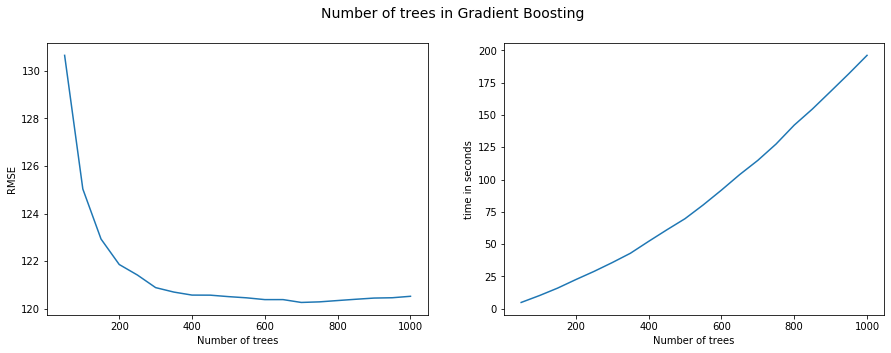

In [221]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Number of trees in Gradient Boosting', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(iters, scores)
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(iters, times)
plt.xlabel('Number of trees')
plt.ylabel('time in seconds')

plt.show()

In [224]:
iters[np.argmin(scores)]

700

In [284]:
scores = []
times = []
depth = np.linspace(0.1, 1, 5)
for i in depth:
    print('\r\r\r\r\r\r\r\r', i, end='')
    start = time.time()
    gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=i)
    scores.append(gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 1.0

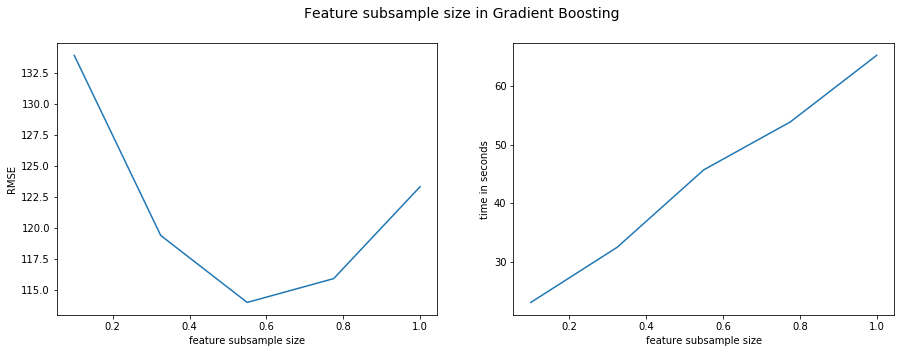

In [285]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Feature subsample size in Gradient Boosting', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(depth, scores)
plt.xlabel('feature subsample size')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(depth, times)
plt.xlabel('feature subsample size')
plt.ylabel('time in seconds')

plt.show()

In [283]:
depth[np.argmin(scores)]

0.775

In [270]:
scores = []
times = []
max_depth = np.arange(1, 15, 3)
for i in max_depth:
    print('\r\r\r\r\r\r\r\r', i, end='')
    start = time.time()
    gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=i)
    scores.append(gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 13

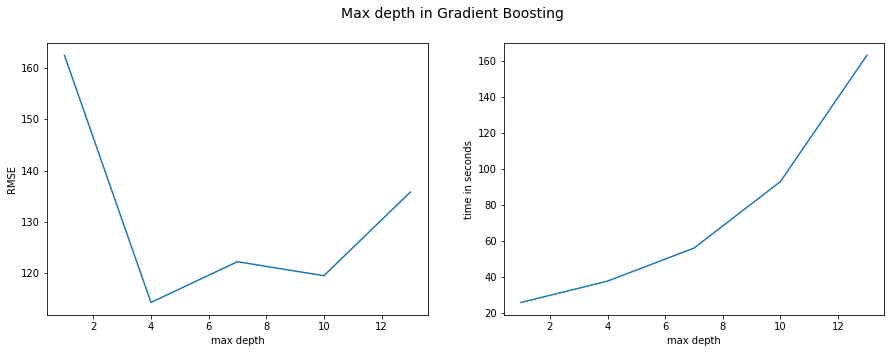

In [271]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Max depth in Gradient Boosting', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(max_depth, scores)
plt.xlabel('max depth')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(max_depth, times)
plt.xlabel('max depth')
plt.ylabel('time in seconds')

plt.show()

In [236]:
start = time.time()
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2), time.time() - start

(112.4413907099116, 45.18332505226135)

In [243]:
start = time.time()
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2), time.time() - start

(111.62956390744779, 38.95130181312561)

In [272]:
scores = []
times = []
learning_rate = np.logspace(-3, 0, 4)
for i in learning_rate:
    print('\r\r\r\r\r\r\r\r', i, end='')
    start = time.time()
    gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4, learning_rate=i)
    scores.append(gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2))
    times.append(time.time() - start)

 1.0

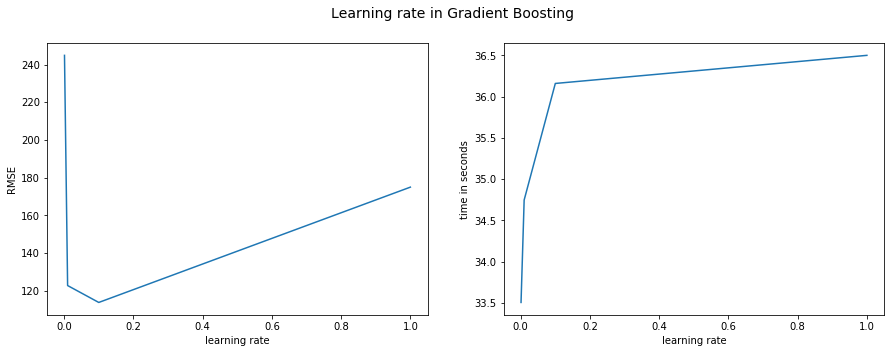

In [273]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Learning rate in Gradient Boosting', fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(learning_rate, scores)
plt.xlabel('learning rate')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(learning_rate, times)
plt.xlabel('learning rate')
plt.ylabel('time in seconds')

plt.show()

In [263]:
%%time
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4, learning_rate=1)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2)

CPU times: user 38.7 s, sys: 468 ms, total: 39.2 s
Wall time: 41.9 s


189.63835189618104

In [264]:
%%time
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4, learning_rate=0.1)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2)

CPU times: user 38.5 s, sys: 406 ms, total: 38.9 s
Wall time: 40 s


113.14996988465455

In [265]:
%%time
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4, learning_rate=0.01)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2)

CPU times: user 35.5 s, sys: 314 ms, total: 35.8 s
Wall time: 36.7 s


122.7339038045814

In [266]:
%%time
gb = GradientBoostingMSE(n_estimators=700, feature_subsample_size=0.55, max_depth=4, learning_rate=0.001)
gb.fit(X_train[:, num_feat], y_train, X_test[:, num_feat], y_test)**(1/2)

CPU times: user 33.2 s, sys: 260 ms, total: 33.5 s
Wall time: 34.1 s


245.5171418590529